<a href="https://colab.research.google.com/github/maham0612/CodeAlpha_CreditScoringModel/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
################################## Step 1: Load Dataset ##################################

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fraud-detection


In [ ]:
import os
# Check what's inside the downloaded folder
print(os.listdir(path))

['fraudTest.csv', 'fraudTrain.csv']


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')

In [ ]:
test_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

In [ ]:
################################## Step 2: Data Understanding & Cleaning ##################################

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [ ]:
df.shape

(1296675, 23)

In [ ]:
test_data.shape

(555719, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
# Numerical summaries
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
# Any missing data?
print(df.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
# Count and % of frauds vs non-frauds
print(df['is_fraud'].value_counts())
print(df['is_fraud'].value_counts(normalize=True) * 100)

is_fraud
0    1289169
1       7506
Name: count, dtype: int64
is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


In [ ]:
# Unique values in each column
print(df.nunique())

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64


In [ ]:
################################## Step 3: EDA Visualization ##################################

 1. Class Balance (Fraud vs. Not Fraud)


/tmp/ipython-input-43-1155988306.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_fraud', palette='pastel')


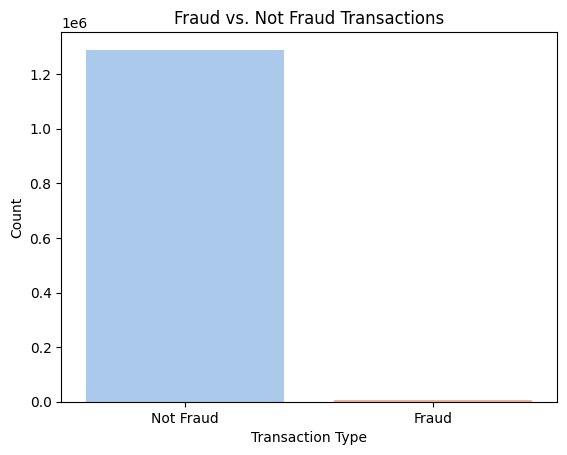

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='is_fraud', palette='pastel')
plt.title("Fraud vs. Not Fraud Transactions")
plt.xticks([0,1], ['Not Fraud', 'Fraud'])
plt.ylabel("Count")
plt.xlabel("Transaction Type")
plt.show()

🔹 2. Top Categories Involved in Fraud

/tmp/ipython-input-47-4137543508.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_category.values, y=fraud_by_category.index, palette='mako')


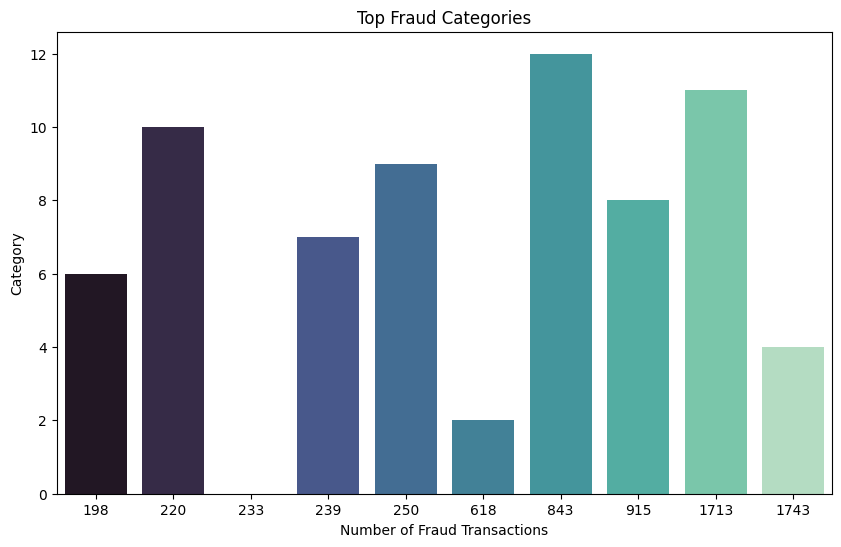

In [ ]:
fraud_by_category = df[df['is_fraud'] == 1]['category'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=fraud_by_category.values, y=fraud_by_category.index, palette='mako')
plt.title("Top Fraud Categories")
plt.xlabel("Number of Fraud Transactions")
plt.ylabel("Category")
plt.show()

4. Gender-wise Fraud Count

/tmp/ipython-input-51-1535675142.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['is_fraud'] == 1], x='gender', palette='Blues')


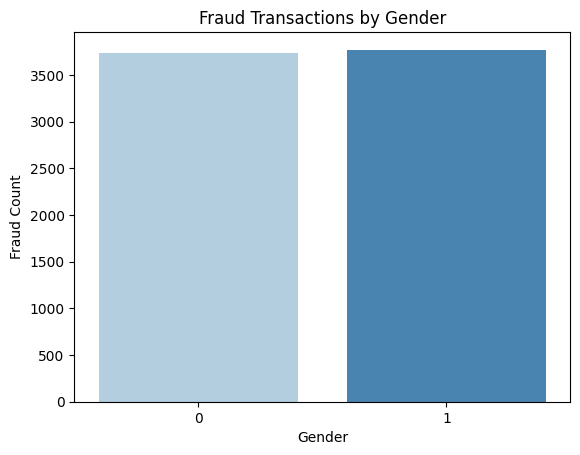

In [ ]:
sns.countplot(data=df[df['is_fraud'] == 1], x='gender', palette='Blues')
plt.title("Fraud Transactions by Gender")
plt.xlabel("Gender")
plt.ylabel("Fraud Count")
plt.show()

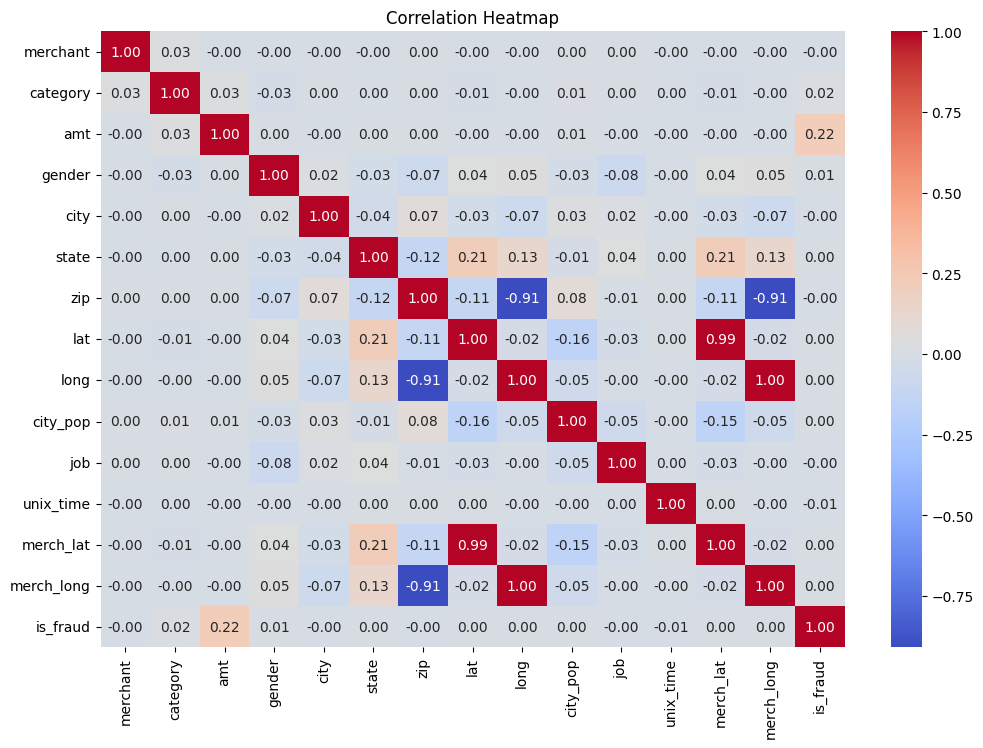

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
################################## Step 4: Data Preprocessing ##################################

In [ ]:
df = df.drop([
    'Unnamed: 0',       # just row number
    'trans_num',        # unique per transaction
    'trans_date_trans_time',  # we'll use unix_time instead
    'cc_num',           # unique to user, not useful
    'first', 'last',    # personal info
    'street',           # personal info
    'dob',              # too specific, better to use age if needed
], axis=1)

In [ ]:
# 2. Encode Categorical Columns
# merchant, category, gender, city, state, job
from sklearn.preprocessing import LabelEncoder

cat_cols = ['merchant', 'category', 'gender', 'city', 'state', 'job']
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
print(df.columns)

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')


In [ ]:
df.shape

(1296675, 15)

In [ ]:
################################## Step 5: Model Training ##################################

In [ ]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())
print("After SMOTE:")
print(y_train_res.value_counts())

Before SMOTE:
is_fraud
0    1031335
1       6005
Name: count, dtype: int64
After SMOTE:
is_fraud
0    1031335
1    1031335
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Helper function
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


In [ ]:
################################## Logistic Regression ##################################

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Train
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_res, y_train_res)

# Predict
y_pred_logreg = logreg.predict(X_test)

# Evaluate
print("=== Logistic Regression ===")
acc = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {acc:.4f}")
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

=== Logistic Regression ===
Accuracy: 0.9514
ROC-AUC Score: 0.8569963922322248
[[245587  12247]
 [   358   1143]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    257834
           1       0.09      0.76      0.15      1501

    accuracy                           0.95    259335
   macro avg       0.54      0.86      0.56    259335
weighted avg       0.99      0.95      0.97    259335



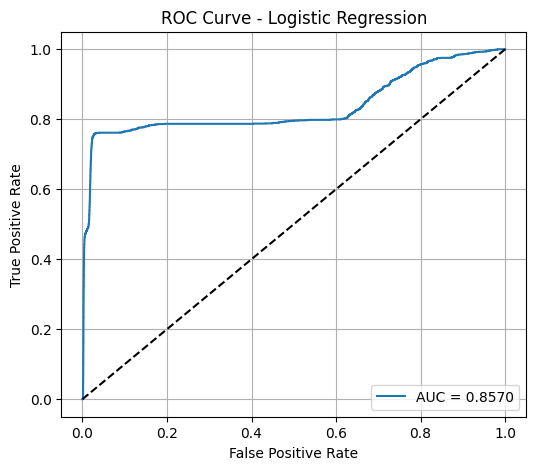

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predicted probabilities
y_score_logreg = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score_logreg)
log_auc_roc = roc_auc_score(y_test, y_pred_logreg)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {log_auc_roc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

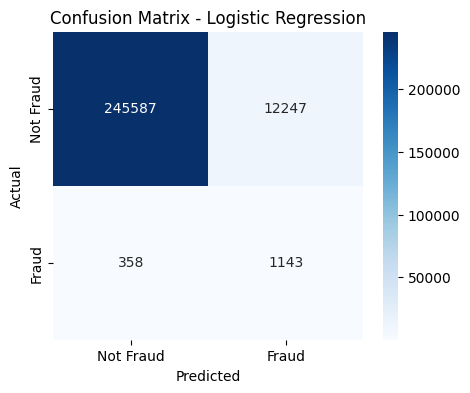

In [ ]:
plot_confusion_matrix(y_test, y_pred_logreg, "Confusion Matrix - Logistic Regression")

In [ ]:
################################## Random Forest ##################################

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
acc_rf = accuracy_score(y_test,  y_pred_rf)
print(f"Accuracy: {acc_rf:.4f}")
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
Accuracy: 0.9975
ROC-AUC Score: 0.8305176839968464
[[257699    135]
 [   508    993]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.88      0.66      0.76      1501

    accuracy                           1.00    259335
   macro avg       0.94      0.83      0.88    259335
weighted avg       1.00      1.00      1.00    259335



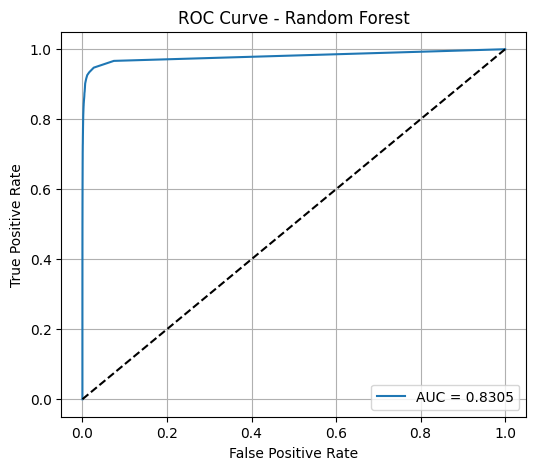

In [ ]:
y_score_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score_rf)
auc = roc_auc_score(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

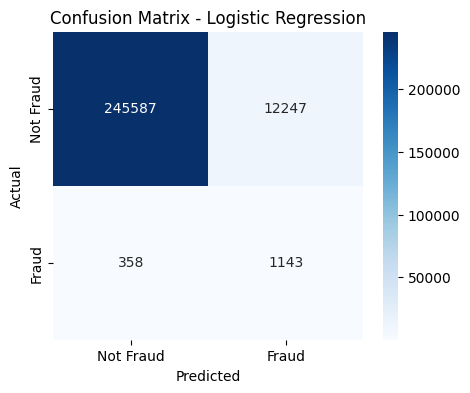

In [ ]:
plot_confusion_matrix(y_test, y_pred_logreg, "Confusion Matrix - Logistic Regression")

In [ ]:
################################## Decision Tree ##################################

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_res, y_train_res)

# Predict
y_pred_tree = tree.predict(X_test)

# Evaluate
print("=== Decision Tree ===")
acc_dt = accuracy_score(y_test,  y_pred_tree)
print(f"Accuracy: {acc_dt:.4f}")
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

=== Decision Tree ===
Accuracy: 0.9798
ROC-AUC Score: 0.8709573616606385
[[252958   4876]
 [   359   1142]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    257834
           1       0.19      0.76      0.30      1501

    accuracy                           0.98    259335
   macro avg       0.59      0.87      0.65    259335
weighted avg       0.99      0.98      0.99    259335



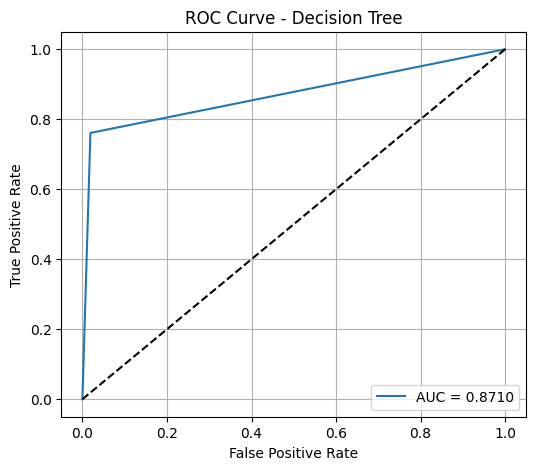

In [ ]:
y_score_tree = tree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score_tree)
auc = roc_auc_score(y_test, y_score_tree)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

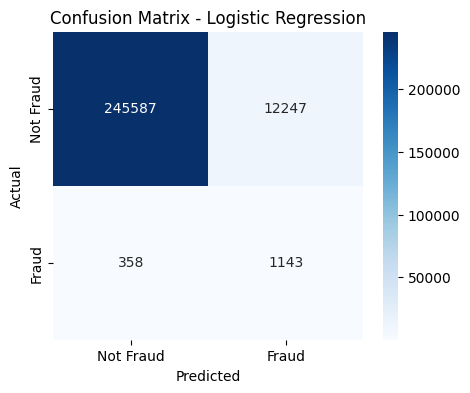

In [ ]:
plot_confusion_matrix(y_test, y_pred_logreg, "Confusion Matrix - Logistic Regression")

In [ ]:
################################## Step 5: Comparision ##################################

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get scores for each model
metrics = {
    'Logistic Regression': {
        'Precision': precision_score(y_test, y_pred_logreg),
        'Recall': recall_score(y_test, y_pred_logreg),
        'F1 Score': f1_score(y_test, y_pred_logreg)
    },
    'Decision Tree': {
        'Precision': precision_score(y_test, y_pred_tree),
        'Recall': recall_score(y_test, y_pred_tree),
        'F1 Score': f1_score(y_test, y_pred_tree)
    },
    'Random Forest': {
        'Precision': precision_score(y_test, y_pred_rf),
        'Recall': recall_score(y_test, y_pred_rf),
        'F1 Score': f1_score(y_test, y_pred_rf)
    }
}

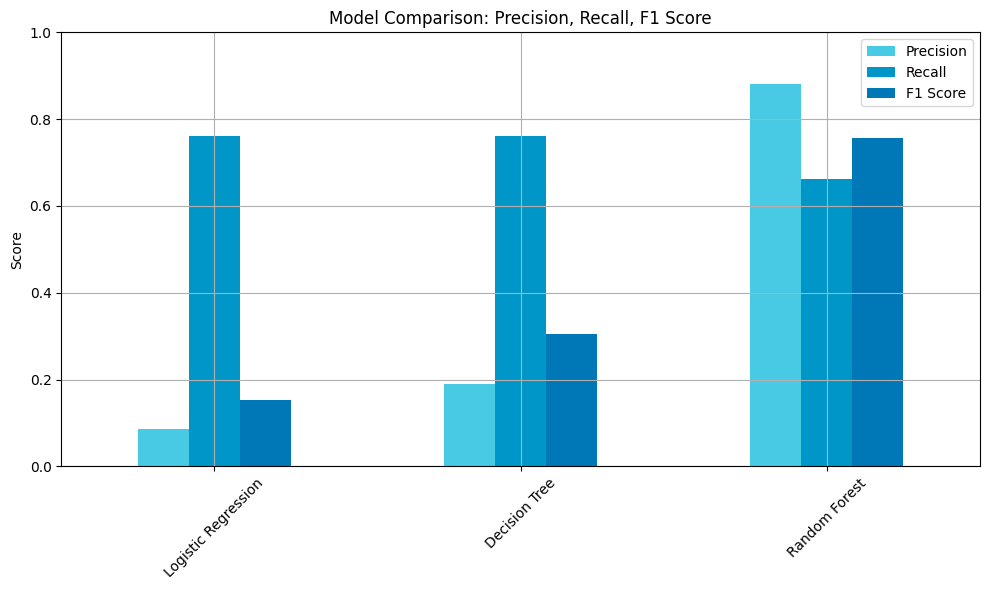

In [ ]:
# Define custom colors for the bars (one per metric)
custom_colors = ['#48cae4', '#0096c7', '#0077b6']  # example: red, green, blue

# Convert dictionary to DataFrame
results_df = pd.DataFrame(metrics).T  # .T = transpose for better layout
# Plot with custom colors
results_df.plot(kind='bar', figsize=(10, 6), color=custom_colors)

plt.title("Model Comparison: Precision, Recall, F1 Score")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

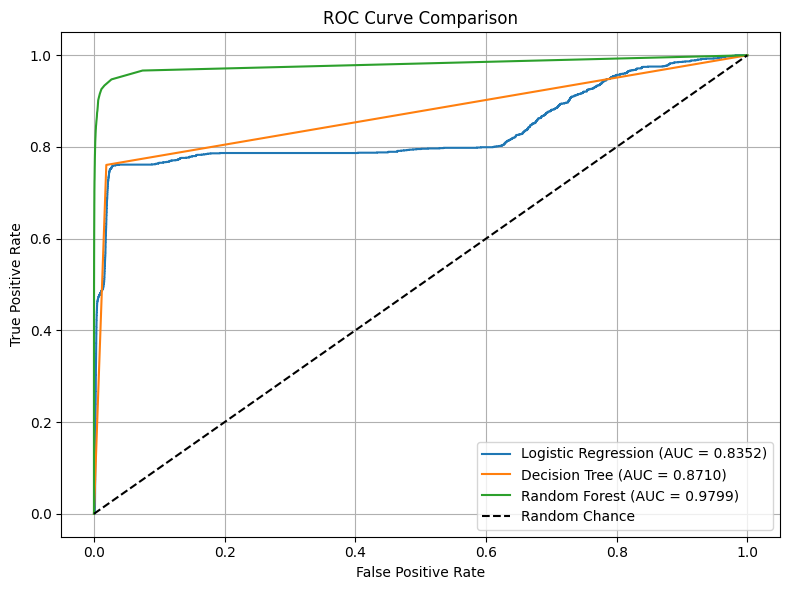

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_score_logreg = logreg.predict_proba(X_test)[:, 1]
y_score_tree = tree.predict_proba(X_test)[:, 1]
y_score_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_score_logreg)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_score_logreg):.4f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_score_tree):.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_score_rf):.4f})')
plt.plot([0,1], [0,1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()